In [1]:
import pandas as pd

In [2]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [3]:
df = pd.DataFrame(data=d)

In [4]:
df.head()

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no


In [5]:
from sklearn.preprocessing import OrdinalEncoder

In [6]:
finished_race = ['no', 'yes']

In [7]:
enc = OrdinalEncoder(categories=[finished_race])

In [8]:
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])

In [9]:
df.head()

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0


In [10]:
import matplotlib.pyplot as plt

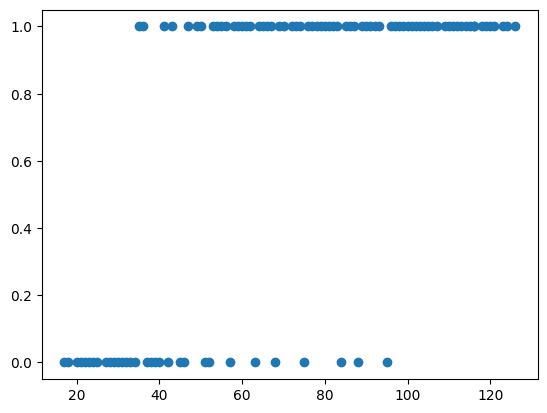

In [11]:
plt.scatter(df['miles_per_week'], df['completed_50m_ultra'])

In [12]:
import seaborn as sns

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

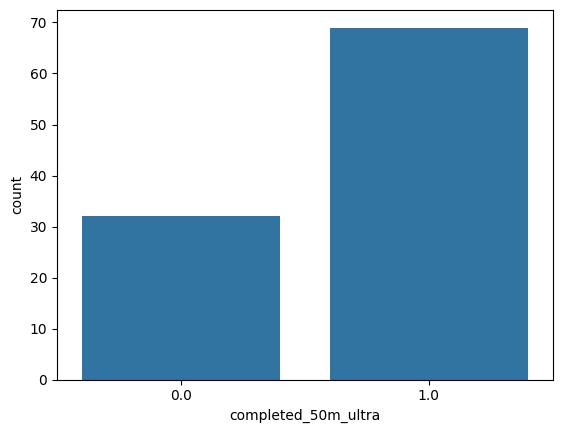

In [14]:
sns.countplot(x=df['completed_50m_ultra'], data=df)

In [15]:
X = df.iloc[:, 0:1]

In [16]:
y = df.iloc[:, 1]

In [19]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: completed_50m_ultra, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=11, stratify=y)

In [23]:
X_train.shape

(80, 1)

In [24]:
X_test.shape

(21, 1)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [28]:
y_pred = model.predict(X_test)

In [29]:
model.score(X_test, y_test)

0.8571428571428571

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(y_test, y_pred))

[[ 5  2]
 [ 1 13]]


In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77         7
         1.0       0.87      0.93      0.90        14

    accuracy                           0.86        21
   macro avg       0.85      0.82      0.83        21
weighted avg       0.86      0.86      0.85        21

